In [1]:
import numpy as np
import matplotlib.pyplot as plt
from roguewavespectrum.spotter import read_spectral_csv
import cartopy.crs as ccrs
from utils.utils import read_spotter_csv

from pathlib import Path
import importlib.util

# Full path to the script
script_path = Path("/Users/annasavage/Documents/github/spotter-sd-parser/sd_file_parser.py")
data_dir = '/Users/annasavage/Documents/github/spotter-sd-parser/example_data/2021-01-15/'

In [2]:
# load spotter-sd-parser into this notebook as if it's a module
spec = importlib.util.spec_from_file_location("sd_file_parser", script_path)
sd_parser = importlib.util.module_from_spec(spec)
spec.loader.exec_module(sd_parser)

In [3]:
dir(sd_parser)

['First',
 'Spectrum',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'applyPhaseCorrection',
 'applyPhaseCorrectionFromVersionNumber',
 'applyfilter',
 'cat',
 'defaultIIRWeightType',
 'defaultVersion',
 'epochToDateArray',
 'extensions',
 'filterSOS',
 'getFileNames',
 'getVersions',
 'log_errors',
 'lowFrequencyFilter',
 'main',
 'missingFLTFile',
 'numpy',
 'ordinalVersionNumber',
 'os',
 'parseLocationFiles',
 'parseSpectralFiles',
 'supportedVersions',
 'sys',
 'validCommandLineArgument']

In [4]:
sd_parser.main(path=data_dir, outpath=data_dir, spectra='all', bulkParameters=True)

Concatenating all FLT files:
- 0235_FLT.CSV (File 1 out of 1)
Processing Spotter output - FLT
- IIR phase correction using weight type:  0
Concatenating all SPC files:
- 0235_SPC.CSV (File 1 out of 1)
Processing Spotter spectral output
Concatenating all SYS files:
- 0235_SYS.CSV (File 1 out of 1)
Concatenating all LOC files:
- 0235_LOC.CSV (File 1 out of 1)
Processing Spotter output - LOC
Concatenating all GPS files:
  No _GPS data files available.
Concatenating all SST files:
- 0235_SST.CSV (File 1 out of 1)
Processing Spotter output - SST
Done.


In [5]:
displacement = read_spotter_csv(data_dir + '/displacement.csv')
displacement

,time,x (m),y(m),z(m)
0,2021-01-15 14:19:18.000,0.589235,0.258826,0.386485
1,2021-01-15 14:19:18.400,0.728677,0.246903,0.277566
2,2021-01-15 14:19:18.799,0.735764,0.253251,0.082523
3,2021-01-15 14:19:19.200,0.670773,0.224059,-0.180378
4,2021-01-15 14:19:19.599,0.474255,0.213250,-0.300691
...,...,...,...,...
199926,2021-01-16 12:32:08.400,-0.137697,-0.262707,0.415689
199927,2021-01-16 12:32:08.799,0.432281,-0.130772,0.578390
199928,2021-01-16 12:32:09.200,1.020970,-0.048431,0.653239
199929,2021-01-16 12:32:09.599,1.627370,0.057440,0.560564


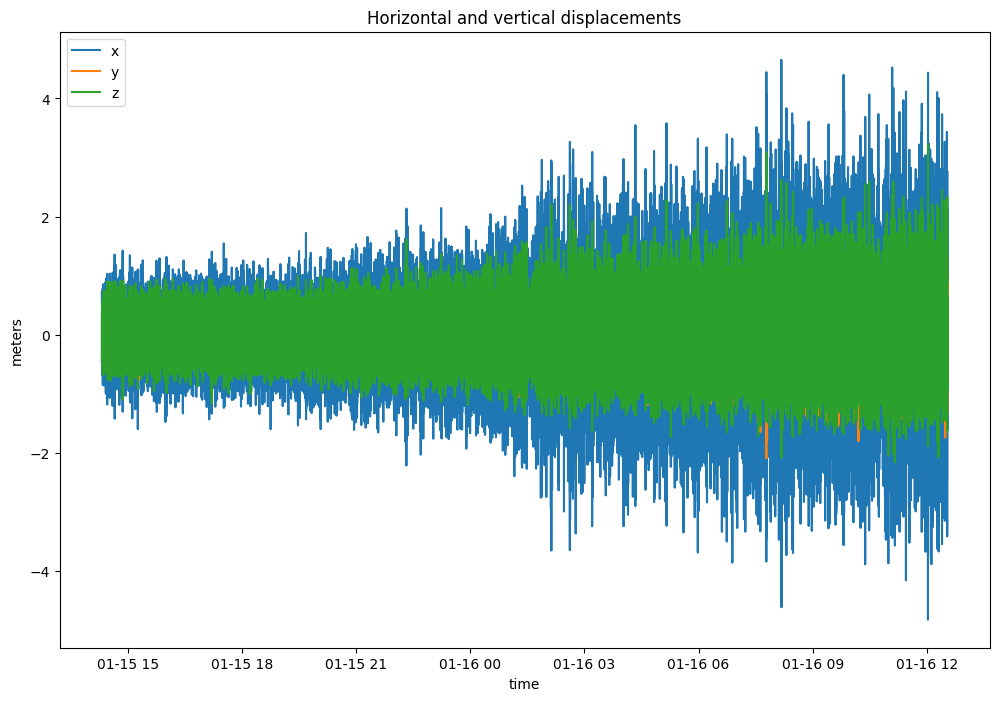

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(displacement['time'], displacement[' x (m)'], label='x')
plt.plot(displacement['time'], displacement[' y(m)'], label='y')
plt.plot(displacement['time'], displacement[' z(m)'], label='z')
plt.xlabel('time')
plt.ylabel('meters')
plt.title('Horizontal and vertical displacements')
plt.legend()

In [7]:
temperature = read_spotter_csv(data_dir + '/sst.csv')

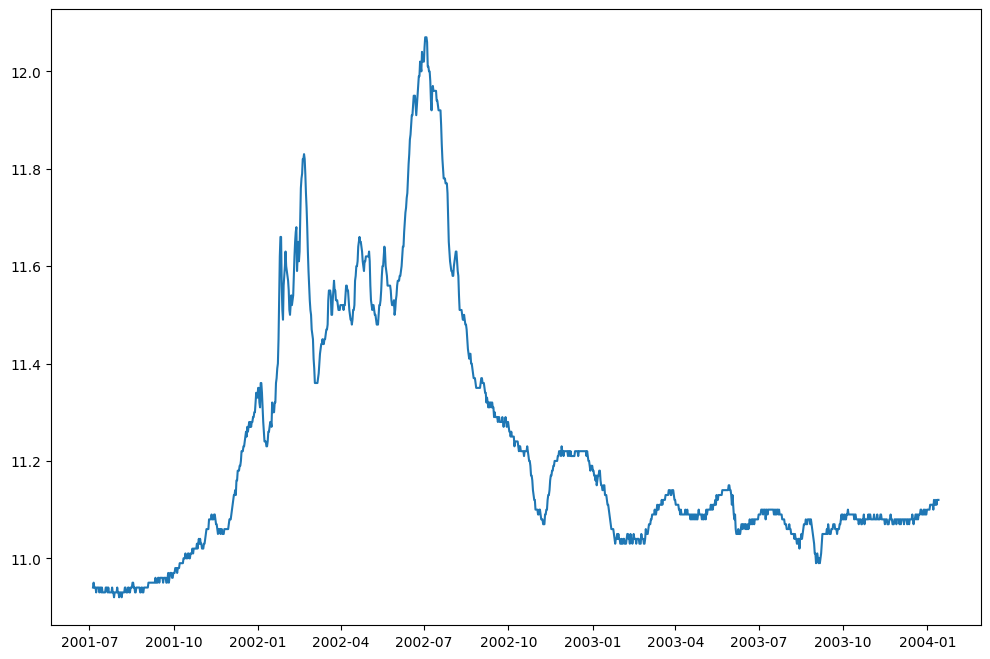

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(temperature['time'], temperature[' T (deg. Celsius)'], label='SST')

In [9]:
location = read_spotter_csv(data_dir + '/location.csv')
location

,time,latitude (decimal degrees),longitude (decimal degrees)
0,2021-01-15 14:19:41.599,37.945329,-122.784303
1,2021-01-15 14:20:42.400,37.945328,-122.784303
2,2021-01-15 14:21:42.799,37.945331,-122.784310
3,2021-01-15 14:22:43.200,37.945330,-122.784309
4,2021-01-15 14:23:43.599,37.945328,-122.784306
...,...,...,...
1319,2021-01-16 12:27:22.799,37.945398,-122.784402
1320,2021-01-16 12:28:23.200,37.945405,-122.784363
1321,2021-01-16 12:29:23.599,37.945413,-122.784346
1322,2021-01-16 12:30:24.000,37.945412,-122.784339


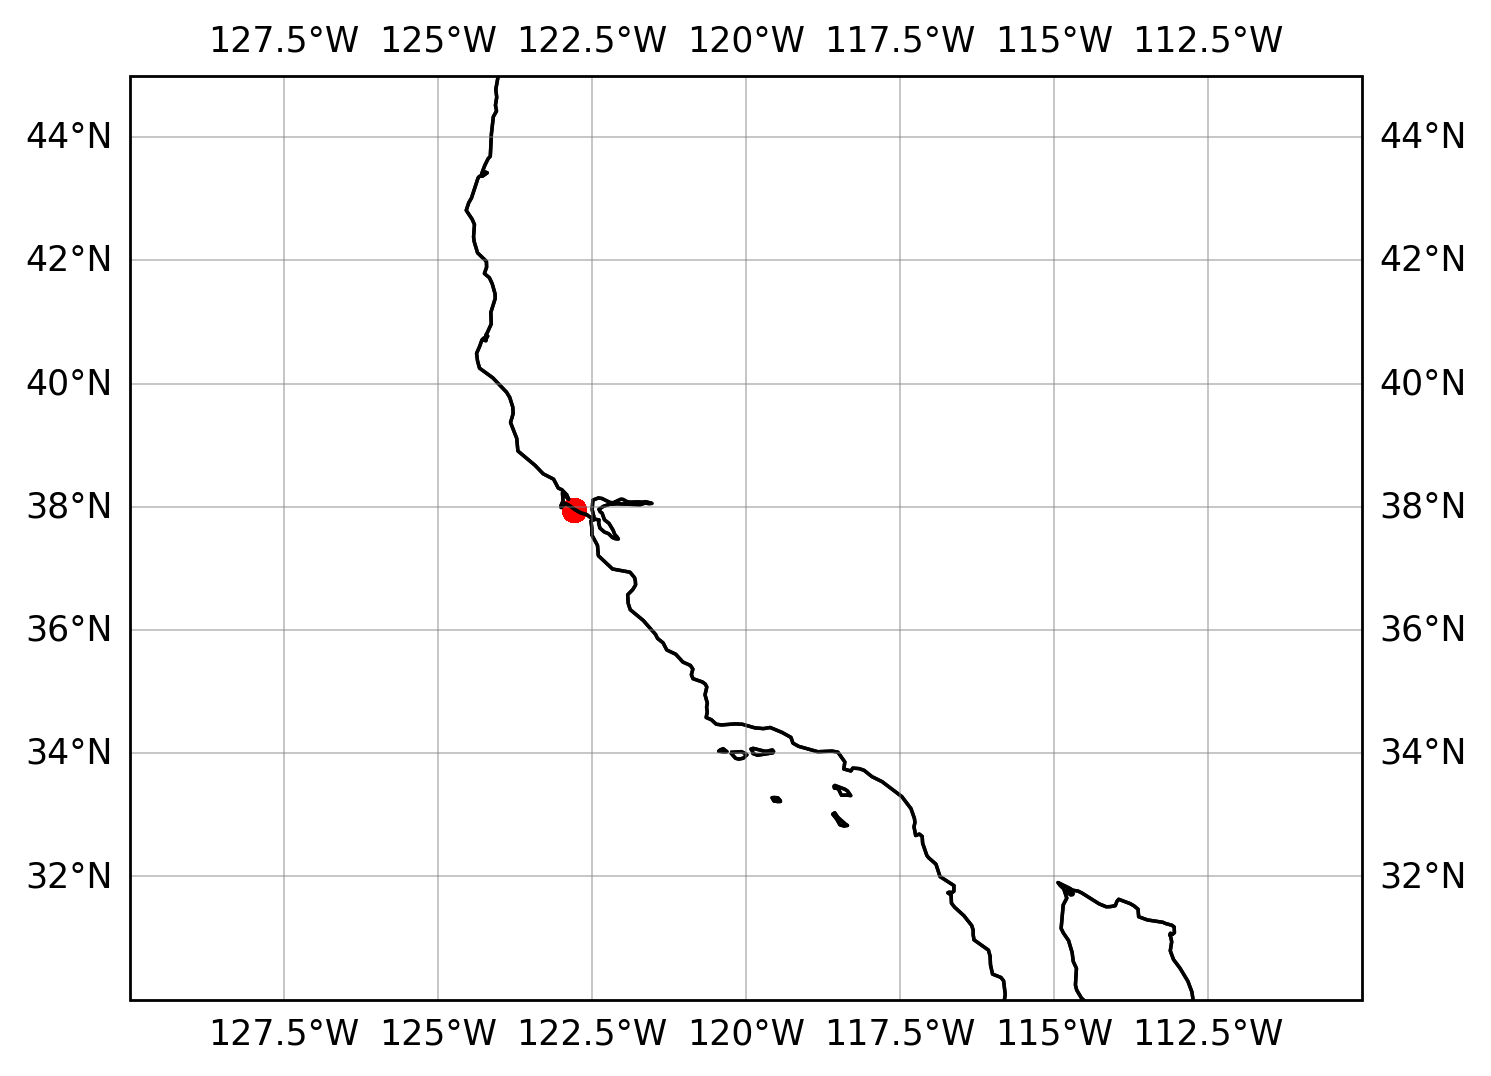

In [10]:
# set up cartopy map to plot location of spotter buoy
proj = ccrs.PlateCarree(central_longitude=180)
fig, ax = plt.subplots(1,1, subplot_kw={'projection': proj}, dpi=250)
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
             linewidth=.5, color='gray', alpha=0.5)

ax.set_extent([-130, -110, 30, 45], crs=ccrs.PlateCarree())
ax.coastlines()
plt.scatter(location['longitude (decimal degrees)'], location[' latitude (decimal degrees)'], c='red', label='location', transform=ccrs.PlateCarree())

In [11]:
spectrum = read_spectral_csv(data_dir)

In [12]:
dir(spectrum)

['A1',
 'A2',
 'B1',
 'B2',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_directionally_integrate',
 '_has_identifiers',
 '_physics_options',
 '_spectrum',
 'a1',
 'a2',
 'angular_frequency',
 'as_frequency_direction_spectrum',
 'as_frequency_spectrum',
 'b1',
 'b2',
 'bandpass',
 'bound_spectrum_1d',
 'coords',
 'coords_space_time',
 'coords_spectral',
 'copy',
 'cumulative_density_function',
 'dataset',
 'depth',
 'dims',
 'dims_space_time',
 'dims_spectral',
 'direction',
 'direction_binwidth',
 'directional_slope_spectrum',
 'directional_variance_density',
 'drop_invalid',
 'energy_period',
 'fillna',
 'flatten',
 'frequency',
 'fr

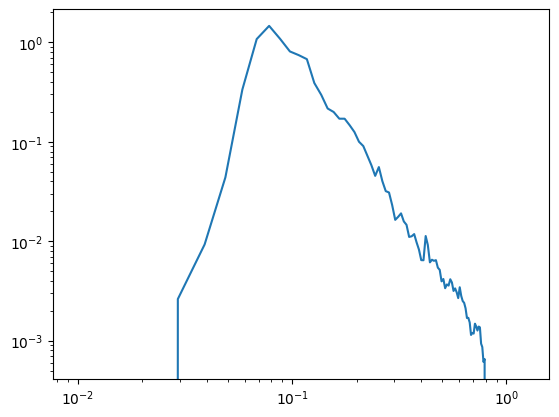

In [13]:
plt.loglog(spectrum.frequency, spectrum.variance_density[0,:])

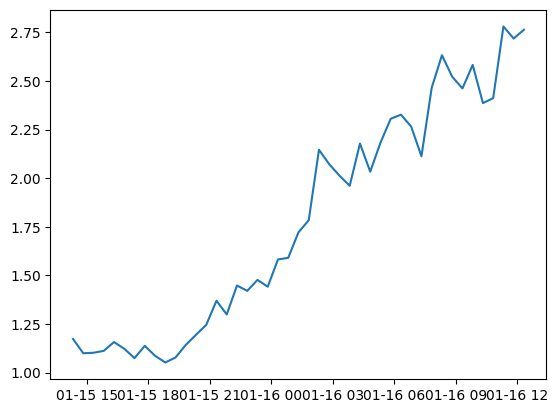

In [14]:
plt.plot(spectrum.time, spectrum.significant_waveheight())

In [15]:
spectrum2D = spectrum.as_frequency_direction_spectrum(number_of_directions=360)

Reconstructing 2d spectrum with mem2 using solution_method scipy:   0%|          | 0/45 [00:00<?, ?it/s]

Text(0.5, 1.0, 'directional spectrum at 2021-01-15T14:19:13.000000000')

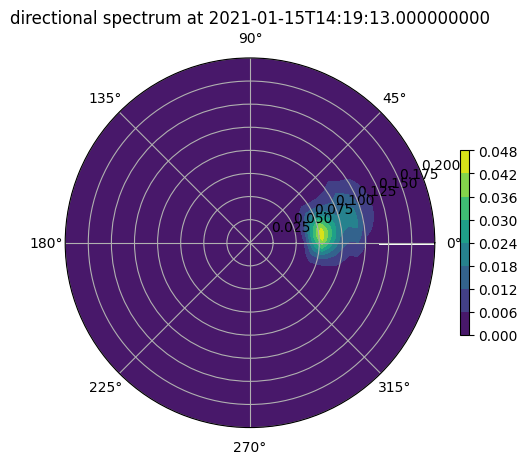

In [16]:
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection='polar'))
theta = np.deg2rad(spectrum2D.direction())
im = ax.contourf(theta, spectrum2D.frequency, spectrum2D.values[0,:], cmap='viridis')
ax.set_xlim([0*np.pi,2*np.pi])
ax.set_ylim([0,0.2])
ax.set_theta_zero_location("E")
ax.grid('on')
plt.colorbar(im,shrink=0.5)
plt.title(f'directional spectrum at {spectrum2D.time[0].values}')

In [17]:
## make movie of spectral heatmaps